## Data 201 Project One
##### Ashlee Rosvall ID:300367094

This is the first of two projects for DATA201. It is due on Monday 29 April, before midnight. 

As with the assignments, please submit only this single jupyter notebook with your code added into it at the appropriate places to http://apps.ecs.vuw.ac.nz/submit/DATA201.

There are two tasks in this project. The first is fairly freeform. The second is more guided, but a bit harder. Not everybody will finish the second one. The two datasets are available on the course webpage.

To get a reasonable grade on this project you should attempt both questions, and do a good job on task 1. Making the PCA work on the shape of the hands as well is what will get you an excellent grade.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

Task 1: Fisheries Bycatch
===

In [2]:
df = pd.read_csv('protected_species_captures.csv')

In [3]:
df.head()

,fishing_year,datetime,taxon,status,identification,capture_method,method,target,vessel_size,area,version,latitude,longitude,mitigation_equipment,excluded
0,2002/2003,2002-09-30 21:45:00+00:00,sooty shearwater,dead,necropsy,net,trawl,Hoki,43+,Fiordland,v20180001,166.055313,-46.704290,NaN,NaN
1,2002/2003,2002-09-30 21:45:00+00:00,sooty shearwater,dead,necropsy,net,trawl,Hoki,43+,Fiordland,v20180001,166.025787,-46.696851,NaN,NaN
2,2002/2003,2002-09-30 21:45:00+00:00,sooty shearwater,dead,necropsy,net,trawl,Hoki,43+,Fiordland,v20180001,166.032242,-46.708154,NaN,NaN
3,2002/2003,2002-09-30 21:45:00+00:00,sooty shearwater,dead,necropsy,net,trawl,Hoki,43+,Fiordland,v20180001,166.057565,-46.683379,NaN,NaN
4,2002/2003,2002-09-30 21:45:00+00:00,white-chinned petrel,dead,necropsy,net,trawl,Hoki,43+,Fiordland,v20180001,166.057377,-46.685194,NaN,NaN


In this data set there are data for a number of fishing events.  Each row is a report of a bycatch event: namely an occasion where a fishing exercise catches a species other than the one that is being targetted.  

The interpretation of some key variables are as follows:

- **fishing_year** - the year of the fishing event
- **datetime** - the day and time of the event
- **taxon** - the species of the bycatch animal that was caught
- **status** - the state of the bytcatch animal
- **capture_method** - the fishing gear being used
- **method** - the implementation of the gear
- **target** - the species that was being targetted when the bycatch occurred
- **area** - region of the ocean where the event occurred
- **lattitude**, **longitude** - precise location of the event

Carry out some exploratory data analysis on this dataset.  For each of the columns **taxon**, **status**, **capture_method**, **method**, **target**, **area** find out what values are in these columns, and work out what they mean.  Find out how frequent each value is, and how much missing data there is.  (This part should be done so that you understand more about the data set - Dont include this in your submission file).

Answer the following questions: (5 marks)
1. How many different species were killed?  (Here 'killed' is defined as having the status of either 'dead', 'killed' or 'decomposed'.)
2. What is the most common combination of capture method and target?
3. Which fishery area is the worst in terms of bycatch? That is, find the **area** with highest number of bycatch events.
4. Draw a scatter plot the latitude and longitude of all fisheries. Mark the area found in the previous question with a different colour.
5. For each fishing year, compute the ratio of 'dead'/'killed'/'decomposed' to 'alive'. Fit a linear regression model to see how this ratio changes with time. Can we say with confidence that the bycatch problem is getting better or worse?

Hint: The use of groupby() function is recommended. Consult the following link for some good explanations and examples of the use of this function: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

More obvious Hint: The following code should give you the number of counts of status="alive" for each year !

In [4]:
#Different species killed
b = df[df.status!='alive'].groupby('taxon')['status'].unique()
print(str(b.size) + ' different species were killed')

91 different species were killed


In [5]:
b = df.groupby(["capture_method", "target"]).size()
b = b.reset_index()
cols = ['capture_method', 'target', 'count']
b.columns = cols
b.max()

capture_method            warp or door
target            Yellowbelly flounder
count                             2993
dtype: object

From this we can see that the most common capture method and target are the yellowbelly founder with the occurence of 2990 times

In [6]:
#area with worst bycatch
a = df.groupby('area').count()
a = a.reset_index()
a.sort_values(['fishing_year'], ascending=False, inplace = True)
worst_area = a['area'].iloc[0]
print('The area with the worst bycatch is: ' + worst_area)

The area with the worst bycatch is: Stewart Snares Shelf


Text(0,0.5,'Longitude')

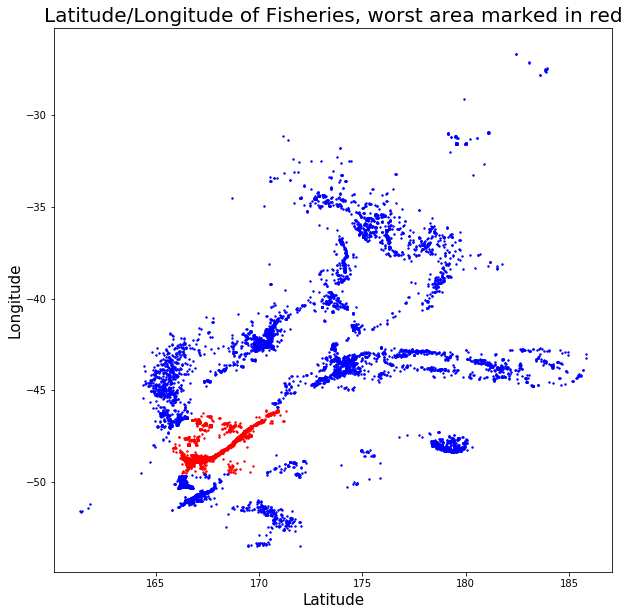

In [7]:
#lat and long plot of all fisheries, marking bad area in different colour
plt.figure(figsize=(10,10))

for i in range(0, len(df.index)):
    area = str(df.iloc[i].area)
    if(area == worst_area):
        col = 'r'
    else:
        col = 'b'
    plt.scatter(df.iloc[i].latitude,df.iloc[i].longitude, c=col, s=2)
plt.title('Latitude/Longitude of Fisheries, worst area marked in red', fontsize = 20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Longitude', fontsize=15)

In [8]:
df = df.dropna(subset=['status'])
b = df[df.status=='alive'].groupby('fishing_year')['status'].count()
c = df[df.status!='alive'].groupby('fishing_year')['status'].count()

In [9]:
b = b.reset_index()
cols = ['fishing_year', 'alive']
b.columns = cols
c = c.reset_index()
cols = ['fishing_year', 'dead/killed/decomposed']
c.columns = cols
b['dead/killed/decomposed'] = c['dead/killed/decomposed']

Text(0,0.5,'Ratio')

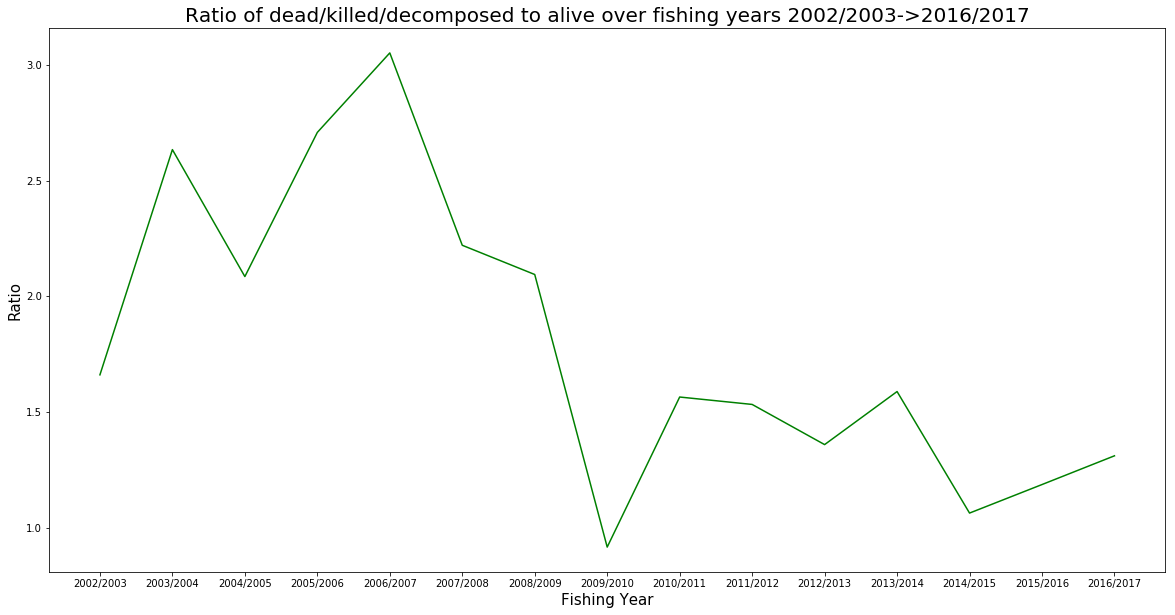

In [10]:
plt.figure(figsize=(20,10))
b['ratio'] = b['dead/killed/decomposed'] / b['alive']
plt.plot(b['fishing_year'], b['ratio'], '-g')
plt.title('Ratio of dead/killed/decomposed to alive over fishing years 2002/2003->2016/2017', fontsize = 20)
plt.xlabel('Fishing Year', fontsize=15)
plt.ylabel('Ratio', fontsize=15)

In [11]:
x = b['fishing_year']
y = b['ratio']

fittedmodel = smf.ols(formula="ratio ~ fishing_year", data=b).fit() 
predictions = fittedmodel.predict(b)
# Print out the statistics

fittedmodel.summary()

C:\Users\Ash\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
C:\Users\Ash\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1549: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Ash\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1550: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
C:\Users\Ash\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1558: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
C:\Users\Ash\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ratio   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Fri, 26 Apr 2019   Prob (F-statistic):                nan
Time:                        17:40:04   Log-Likelihood:                 496.75
No. Observations:                  15   AIC:                            -963.5
Df Residuals:                       0   BIC:                            -952.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.6606        inf          0        nan         nan         nan
fishing_year[T.2003/2004]     0.9731        inf          0        nan         nan         nan
fishing_year[T.2004/2005]     0.4246        inf          0        nan         nan         nan
fishing_year[T.2005/2006]     1.0475        inf          0        nan         nan         nan
fishing_year[T.2006/2007]     1.3910        inf          0        nan         nan         nan
fishing_year[T.2007/2008]     0.5599        inf          0        nan         nan         nan
fishing_year[T.2008/2009]     0.4335        inf          0        nan         nan         nan
fishing_year[T.2009/2010]    -0.7443        inf         -0        nan         nan         nan
fishing_year[T.2010/2011]    -0.0959        inf         -0        nan         nan         nan
fishing_year[T.2011/2012]    -0.1279        inf         -0        nan         nan         nan
fishing_year[T.2012/2013]    -0.3014        inf         -0        nan         nan         nan
fishing_year[T.2013/2014]    -0.0722        inf         -0        nan         nan         nan
fishing_year[T.2014/2015]    -0.5973        inf         -0        nan         nan         nan
fishing_year[T.2015/2016]    -0.4740        inf         -0        nan         nan         nan
fishing_year[T.2016/2017]    -0.3499        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                       16.224   Durbin-Watson:                   0.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.578
Skew:                           1.724   Prob(JB):                      0.00113
Kurtosis:                       6.135   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From both the plot of the ratio and from the coefficient values we can see that there was an increase in the not alive/alive ratio up until the fishing year of 2009/2010 at which point the ratio dropped greatly and the coefficients changed from positive to negative values.

This shows that for the first six fishing years recorded in the dataset, there was a high rate of dead/killed/decomposed animals caught in the bycatch, peaking at the year 2006/2007 which has the highest coefficient of 1.39 and also the peak on the graph. 

After the massive drop which occured over the 2009/2010 fishing year there is still an increase in certain years such as 2013/2014 over the previous year, but the ratio overall is much smaller. This shows that the problem is getting better overall, but that there is still work to be done to make the ratio permanently decrease and protect the animals caught in the bycatch.

Earlier versions of this kind of data lead to the Ministry of Primary Industries taking bycatch seriously. Briefly discuss how this data could best be used, and what, if any, ethical implications there are for it. (2 Marks)

The data could best be used to show the dangers to protected species from the various methods of bycatch in order to show how many animals are dying to these methods. It can also show the worst areas for the bycatch and help the MPI take action against fisheries especially in those areas for their practises. The data can show the failures of the MPI in the past to protect these species, and ensure that they take more affirmative steps in the future 

There are the ethical implications of this data from an environmental point of view as an incorrect handling of this data or ignoring of it can lead to more and more animals being killed while others are the target of a bycatch. It can also show which methods are more dangerous and lead to the reduction or removal of those methods in use with fishing. The data also leads to the MPI taking action and having more ethical processes on board as many fishing boats as possible, lowering the risk and deaths of these species and protecting them from commercial pursuits.

Task 2: Hand Shapes
===

In this task you are going to see an interesting thing that you can do with PCA, namely deform shapes. We describe each shape with a set of landmark points, and then look at how each landmark varies in its position across the dataset. 
There are 40 images of hands from 4 people, with 56 landmarks in 2D on each. 

The data is in hands.txt on the course webpage.

The dataset has 40 columns and 112 rows.  Each column contains the image of one hand.  The first 56 rows are the x coordinates, and the next 56 rows contain the y coordinates.

(There are 4 Marks for this task.)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Load the data
points = np.loadtxt('hands.txt',delimiter=' ')


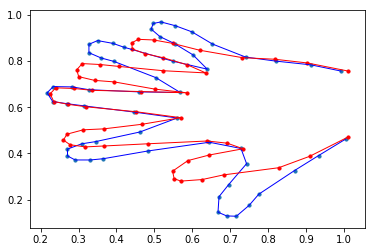

In [14]:
hand1_x = points[:56, 0]
hand1_y = points[56:, 0]
hand2_x = points[:56, 3]
hand2_y = points[56:, 3]

plt.scatter(hand1_x, hand1_y, s=10)
plt.plot(hand1_x, hand1_y, '-b', linewidth=1)

plt.scatter(hand2_x, hand2_y, s=10, c='r')
plt.plot(hand2_x, hand2_y, '-r', linewidth=1)

Now plot two of the hands to see what they look like. The $x$ coordinates are the first 56 numbers, and the $y$ coordinates the next 56, so you can plot points[:56,0] and points[56:,0]

Plot the points for all the hands on a single graph, so that you can see what a mess it is. You will need to write a loop over the rows of points to plot them all.

Plot the first hand on top (with a line between the points) to see if you can see any structure.

In [15]:
def plot_points():
    for i in range(40):
        plt.scatter(points[:56, i], points[56:, i], s=10, c='b')

    plt.plot(points[:56, 0], points[56:, 0], '-r', linewidth=2)
    return

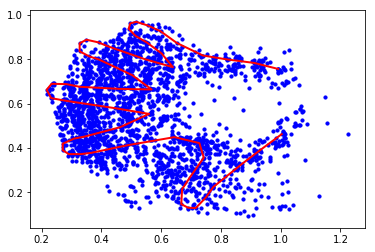

In [16]:
plot_points()

Now use the standardisation from scikit-learn to transform the data and plot it again. You will see that it hasn't made things better. 

In [17]:
from sklearn.preprocessing import StandardScaler

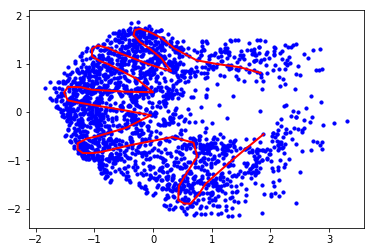

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

scaler = StandardScaler()
points = scaler.fit_transform(points)

plot_points()

Aligning shape data is a bit harder. The way to perform the alignment is called **Procrustes alignment**. This name comes from Greek mythology. Procrustes was an innkeeper, who claimed the beds in his hotel were the perfect size for everybody. However, to make this true, he changed the person to fit the bed, not the bed to fit the person, stretching them or chopping bits off as necessary. Procrustes alignment does the same thing, without the brutality. 

It does this by rotating, translating, and scaling each set of points so that they are as close as possible to one that we choose as the reference set (the first, for simplicity). We implement this by following a set of steps:

(1) For each hand, move it so that the centroid (middle point) is at the origin by subtracting off the mean in x and y separately. In other words, compute the mean of the x coordinates of each shape, and subtract that from all of them, and the same in y. 
I've made you a new array called newpoints to put the data into. The command to compute the mean is np.mean. It's syntax is np.mean(A,axis=0), which computes the mean of each column of matrix A.

In [19]:
newpoints = np.zeros(np.shape(points))

def move():
    for i in range (40):
        x_mean = np.mean(points[:56,i])
        y_mean = np.mean(points[56:,i]) #, axis=0)
        
        
        for j in range (56):
            newpoints[j, i] = points[j,i] - x_mean
            newpoints[j + 56, i] = points[j + 56,i] - y_mean
    return

(2) Scale each hand so that the root mean square distance from the points to the origin is 1.  This accounts for the fact that some hands are large and some are small: this scaling makes them all (approximately) the same size.  

So compute the scale factor as $s = 1/k * \sqrt{(x_1 - \bar{x})^2 + (y_1 - \bar{y})^2 + \ldots + (y_k - \bar{y})^2}$ where there are $k$ points in each hand (so $k=56$). np.sum will help you do the addition. Then divide each of the points by this scale factor.

In [20]:
def scale():
    for i in range (40):
        #calculate the mean of each hand x and y
        x_bar = np.mean(newpoints[:56,i])
        y_bar = np.mean(newpoints[56:,i])
        #subtract the mean from each point to get each value of (x1 -xmean etc)
        x_s = newpoints[:56, i] - x_bar
        y_s = newpoints[56:, i] - y_bar
        #Compute the scale factor as s = 1/k * root(sum(each point squared))
        s = (1/56) * np.sqrt(np.sum(np.square(newpoints[:,i])))
        newpoints[:, i] = newpoints[:, i] / s
    return

(3) Now rotate each hand from 1 to 40 so that it best lines up with hand 0. This is harder than the others, so I've done it for you. 

In [21]:
def rotate():
    for i in range(1,40):
        a = np.sum(newpoints[:,i]* newpoints[:,0])
        b = np.sum(newpoints[:56,i]*newpoints[56:,0] - newpoints[:56,0]*newpoints[56:,i])
        theta = np.arctan2(b , max(a, 10**-10))
        for j in range(56):
            point = np.array([newpoints[j,i],newpoints[j+56,i]])
            x = np.dot(np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]), point)
            newpoints[j,i] = x[0]
            newpoints[j+56,i] = x[1]
    return

In [22]:
move()
scale()
rotate()

Now plot the data again. It's better, but the hand isn't properly lined up yet. 

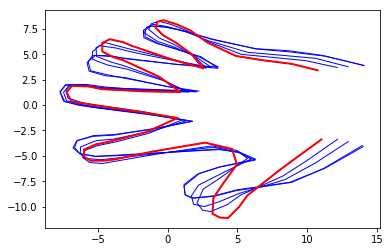

In [23]:
for i in range(5):
    plt.plot(newpoints[:56, i], newpoints[56:, i], linewidth=1, c='b')
plt.plot(newpoints[:56, 0], newpoints[56:, 0], '-r', linewidth=2)

We can make things better, by replacing the points data with newpoints, replacing the first datapoint with the mean, and then running the translation, rotation and scaling again. Run the code below, and then the previous three bits of code again. This time, the plot should look a bit more convincing.

In [24]:
points = newpoints
meanshape = np.mean(newpoints,axis=1)
points[:,0] = meanshape

move()
scale()
rotate()

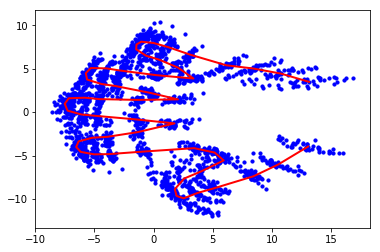

In [25]:
for i in range(40):
    plt.scatter(newpoints[:56, i], newpoints[56:, i], s=10, c='b')
plt.plot(newpoints[:56, 0], newpoints[56:, 0], '-r', linewidth=2)

Below is my code to do PCA. Run it. 

In [26]:
# Compute the covariance matrix
C = np.cov(newpoints)

# Get the eigenvalues and eigenvectors
evals,evecs = np.linalg.eig(C)

# Now need to sort them into descending order
indices = np.argsort(evals)
indices = indices[::-1]
evecs = evecs[:,indices]
evals = evals[indices]
evecs = np.real(evecs)  

**evecs** has 112 columns - one for each of the 112 principal components.  **evals** contains the weighting of each component.  The principal components are ordered by descending weight, so only the first few are important in describing the data.  

Plot the mean shape (i.e., the shape you get when you just compute the mean of each datapoint across the whole dataset), and also the mean shape plus and minus a small amount in each of the first few PCs (one at a time). See if you can work out what each of them does.

In [27]:
print(evecs.shape)
print(evals.shape)

(112, 112)
(112,)


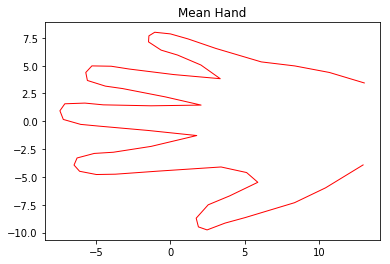

In [28]:
mean_points = np.zeros(112)

for i in range(56):
        a = np.mean(newpoints[i,:])
        b = np.mean(newpoints[i+56,:])
        mean_points[i] = a
        mean_points[i+56] = b

plt.title('Mean Hand')
plt.plot(mean_points[:56], mean_points[56:], '-r', linewidth=1)


Text(0.5,1,'Principal Component 1')

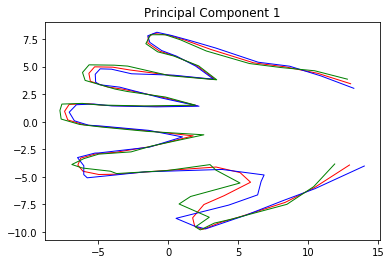

In [29]:
red_hand = mean_points.copy()
blue_hand = mean_points - (5.0 * evecs[0,:])
green_hand = mean_points + (5.0 * evecs[0,:])

plt.plot(red_hand[:56], red_hand[56:], '-r', linewidth=1)
plt.plot(blue_hand[:56], blue_hand[56:], '-b', linewidth=1)
plt.plot(green_hand[:56], green_hand[56:], '-g', linewidth=1)
plt.title('Principal Component 1')

Text(0.5,1,'Principal Component 2')

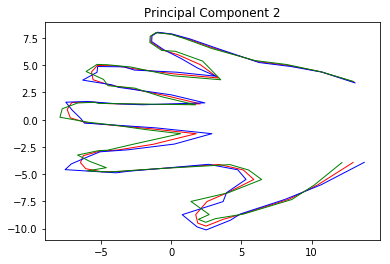

In [30]:
blue_hand2 = mean_points - (5.0 * evecs[1,:])
green_hand2 = mean_points + (5.0 * evecs[1,:])

plt.plot(red_hand[:56], red_hand[56:], '-r', linewidth=1)
plt.plot(blue_hand2[:56], blue_hand2[56:], '-b', linewidth=1)
plt.plot(green_hand2[:56], green_hand2[56:], '-g', linewidth=1)
plt.title('Principal Component 2')


Text(0.5,1,'Principal Component 3')

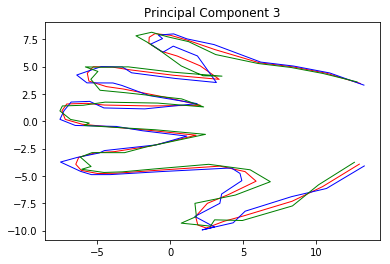

In [31]:
blue_hand = mean_points - (5.0 * evecs[2,:])
green_hand = mean_points + (5.0 * evecs[2,:])

plt.plot(red_hand[:56], red_hand[56:], '-r', linewidth=1)
plt.plot(blue_hand[:56], blue_hand[56:], '-b', linewidth=1)
plt.plot(green_hand[:56], green_hand[56:], '-g', linewidth=1)
plt.title('Principal Component 3')

Text(0.5,1,'Principal Component 4')

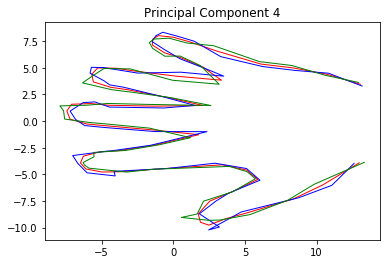

In [32]:
blue_hand = mean_points - (5.0 * evecs[3,:])
green_hand = mean_points + (5.0 * evecs[3,:])

plt.plot(red_hand[:56], red_hand[56:], '-r', linewidth=1)
plt.plot(blue_hand[:56], blue_hand[56:], '-b', linewidth=1)
plt.plot(green_hand[:56], green_hand[56:], '-g', linewidth=1)
plt.title('Principal Component 4')

Decide how many principal components you should use by plotting the cumulative sum of the eigenvalues. Explain your answer.

In [33]:
c_s = 0.0
for i in range(10):
    c_s = c_s + evals[i]
    print('For eigenvalue ' + str(i))
    print('The cumulative sum is: ' + str(c_s))
    

For eigenvalue 0
The cumulative sum is: (45.81519521574977+0j)
For eigenvalue 1
The cumulative sum is: (58.47733055511213+0j)
For eigenvalue 2
The cumulative sum is: (64.2283730932528+0j)
For eigenvalue 3
The cumulative sum is: (65.78353094848718+0j)
For eigenvalue 4
The cumulative sum is: (67.17684196534441+0j)
For eigenvalue 5
The cumulative sum is: (68.20951085431481+0j)
For eigenvalue 6
The cumulative sum is: (68.73528974566067+0j)
For eigenvalue 7
The cumulative sum is: (69.08093016075314+0j)
For eigenvalue 8
The cumulative sum is: (69.36327777892687+0j)
For eigenvalue 9
The cumulative sum is: (69.53903773460368+0j)


Summing the cumulative value of the first ten eigenvalues shows how useful they may be. As we include the first PC, which has a sum of 45, we can see from here how each subsequent eigenvalue increases the sum by either a large or small amount. From here we can see that the increase in sum by adding PC2 and PC3 is large enough to increase the sum from 45 to 58 then 64.

As a general rule, PCs are added when their increase in the sum is > 1. From this we can see that PC4 and PC5 are also both useful, but from here the increase in sum is less than 1 so we do not need to add any more PCs

In short, PC 1-5 are useful, more than that is not
